## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

### Мосалев Максим Сергеевич ИАД-7

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones). 

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\79061\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
# для скачивания датасета с kaggle необходимо установить библиобеку opendatasets.
# получить токен (файл kaggle.json) в личном кабинете kaggle с помощью кнопки 'create new Token',
# где можно посмотреть your Kaggle Username и Your Kaggle Key
import opendatasets as od
od.download(r"https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maximmosalev
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 24.5M/24.5M [01:02<00:00, 414kB/s]


In [2]:
train = pd.read_csv('human-activity-recognition-with-smartphones/train.csv')
test = pd.read_csv("human-activity-recognition-with-smartphones/test.csv")

In [3]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [4]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [5]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [6]:
train.isnull().sum() #посмотрим есть ли пропуски

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [7]:
test.isnull().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [8]:
train[train.duplicated()] #посмотрим есть ли дубли

Empty DataFrame
Columns: [tBodyAccMag-mean(), tBodyGyroJerk-mad()-X, tGravityAcc-min()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2, angle(X,gravityMean), angle(Y,gravityMean), angle(Z,gravityMean), fBodyAcc-skewness()-X, subject, Activity]
Index: []

In [9]:
test[test.duplicated()]

Empty DataFrame
Columns: [tBodyAccMag-mean(), tBodyGyroJerk-mad()-X, tGravityAcc-min()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2, angle(X,gravityMean), angle(Y,gravityMean), angle(Z,gravityMean), fBodyAcc-skewness()-X, subject, Activity]
Index: []

Пропусков и дублей нет

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [10]:
train.describe().iloc[:,:-1] #выведем основные статистики, не учитывая номер испытуемого(т. к. искусственный номер не интересует)

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  
count           7352.000000           7352.000000            7352.000000  
mean               0.058593             -0.056515              -0.128562  
std                0.297480              0.279122               0.403686  
min               -1.000000             -1.000000              -0.931208  
25%               -0.017885             -0.143414              -0.486841  
50%                0.182071              0.003181              -0.163271  
75%                0.248353              0.107659               0.155112  
max                0.478157              1.000000               1.000000

Все значения признаков лежат в пределах [-1, 1]. Большое количество значений признаков отрицательны. Отрицательных значений больше, чем положительных. angle(Y,gravityMean)(угол между осью Y и усредненной гравитационной составляющей ускорения) единтсвенный признак, который не превышает величины 0.478157.

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [11]:
b = []
for i in train['Activity'].unique():
    b.append((i, train[train['Activity'] == i].shape[0])) #посчитаем количество наблюдений для всех категорий и сохраним в список
b.sort(key=lambda x: x[1]) #отсортируем
print(*b) 
print(100 - round(b[0][1]/b[-1][1]*100)) #посчитаем разницу в процентах

('WALKING_DOWNSTAIRS', 986) ('WALKING_UPSTAIRS', 1073) ('WALKING', 1226) ('SITTING', 1286) ('STANDING', 1374) ('LAYING', 1407)
30


In [12]:
b = []
for i in test['Activity'].unique():
    b.append((i, test[test['Activity'] == i].shape[0])) #посчитаем количество наблюдений для всех категорий и сохраним в список
b.sort(key=lambda x: x[1]) #отсортируем
print(*b) 
print(100 - round(b[0][1]/b[-1][1]*100)) #посчитаем разницу в процентах

('WALKING_DOWNSTAIRS', 420) ('WALKING_UPSTAIRS', 471) ('SITTING', 491) ('WALKING', 496) ('STANDING', 532) ('LAYING', 537)
22


Разница не превышает 30%, так что для наших целей будем считать, что данные сбалансированы и в train, и в test.

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [13]:
train.insert(loc=9, column='Activity_code', value = train['Activity'], ) # добавим столбец для кодирования Activity

In [14]:
# закодируем активности
c = 0
for i in train['Activity'].unique():
    train.loc[train['Activity_code'] == i, 'Activity_code'] = c
    c += 1
train.Activity_code = train.Activity_code.astype(int)

In [15]:
train.iloc[:, :-2].corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
Activity_code                           0.843173               0.717213   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
Activity_code                            0.066679          0.823796   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
Activity_code                                     0.666081   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)                      1.000000             -0.783848   
angle(Y,gravityMean)                     -0.783848              1.000000   
angle(Z,gravityMean)                     -0.643655              0.594885   
fBodyAcc-skewness()-X                     0.265523             -0.046213   
Activity_code                            -0.050553              0.234964   

                              angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
tBodyAccMag-mean()                        0.426283               0.379796   
tBodyGyroJerk-mad()-X                     0.380967               0.266002   
tGravityAcc-min()-X                       0.667415              -0.261676   
tBodyAcc-max()-X                          0.405023               0.335708   
fBodyAcc-bandsEnergy()-1,8.2              0.423927               0.260316   
angle(X,gravityMean)                     -0.643655               0.265523   
angle(Y,gravityMean)                      0.594885              -0.046213   
angle(Z,gravityMean)                      1.000000              -0.183815   
fBodyAcc-skewness()-X                    -0.183815               1.000000   
Activity_code                             0.219376               0.496699   

                              Activity_code  
tBodyAcc

Мы получили у некоторых признаков сильную зависимость. Например, у tBodyAcc-max()-X	и tBodyAccMag-mean(), это и понятно, потому что усредненная величина ускорения тела высчитывается, используя величину ускорения тела по оси Х. Также между tBodyAccMag-mean() и tBodyGyroJerk-mad()-X, опять же понятно, что величина рывка тела зависит от величины ускорения тела.

Вдобавок, почти полную отрицательную линейную связь имеют признаки angle(X,gravityMean) и tGravityAcc-min()-X, это объясняется тем, что эти признаки также вычисляются с помощью гравитационной составляющей ускорения по оси Х. 

Таким образом, большинство взаимосвязей объясняется, исходя из геометриеских соображений. 


Что касается таргета, мы видим большую положительную зависимость между таргетом и tBodyAccMag-mean()-усредненной величиной ускорения тела и tBodyAcc-max()-X - максимальной величиной ускорения тела по оси Х. Это соответствует здравому смыслу: чем человек быстрее, активнее двигается, тем больше его ускорение.

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

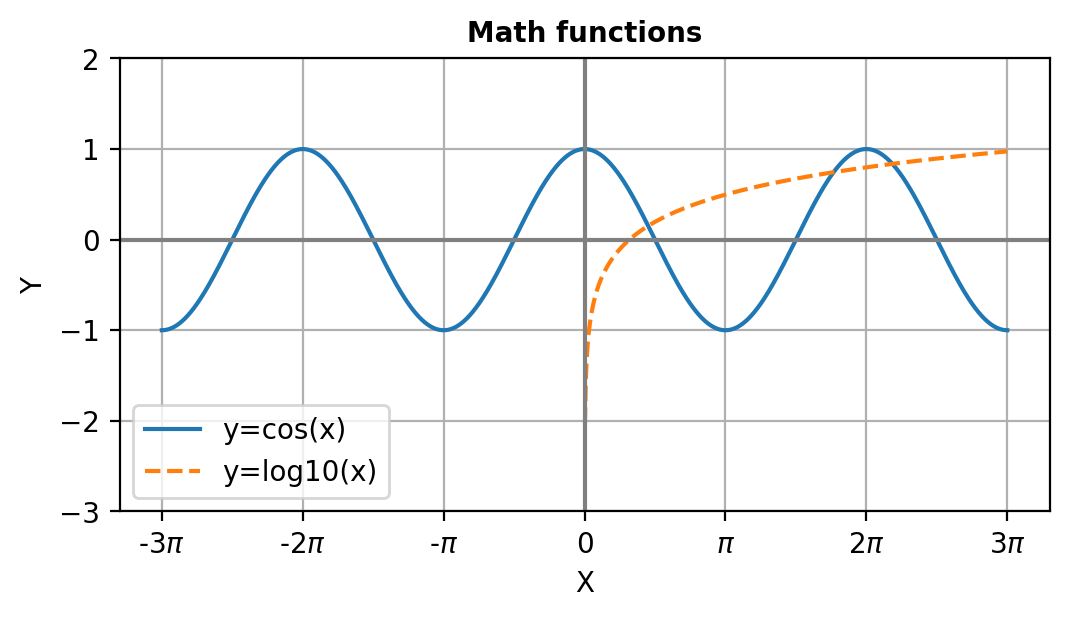

In [16]:
x=np.linspace(-540, 540, 1000) #получим точки для построения графика 
y1=np.cos(np.deg2rad(x))
y2=np.log10(np.deg2rad(x))

plt.figure(figsize=(6, 3), dpi=200) #строим график 
plt.plot(x, y1)
plt.plot(x, y2, '--')

plt.yticks(np.arange(-3, 3, 1.0))
points = np.array([-3*np.pi, -2*np.pi, -np.pi, 0,  np.pi, 2*np.pi, 3*np.pi]) #подпишем красиво ось X
labels = [r'-3$\pi$', r'-2$\pi$', r'-$\pi$', '$0$', r'$\pi$', r'2$\pi$', r'3$\pi$']
plt.xticks(np.rad2deg(points), labels)

plt.grid(True) #продолжим наводить красоту 
ax = plt.gca()
ax.axhline(y=0, color='gray')    
ax.axvline(x=0, color='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(label='Math functions', fontsize=10, weight='bold')
plt.legend(('y=cos(x)', 'y=log10(x)'));

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

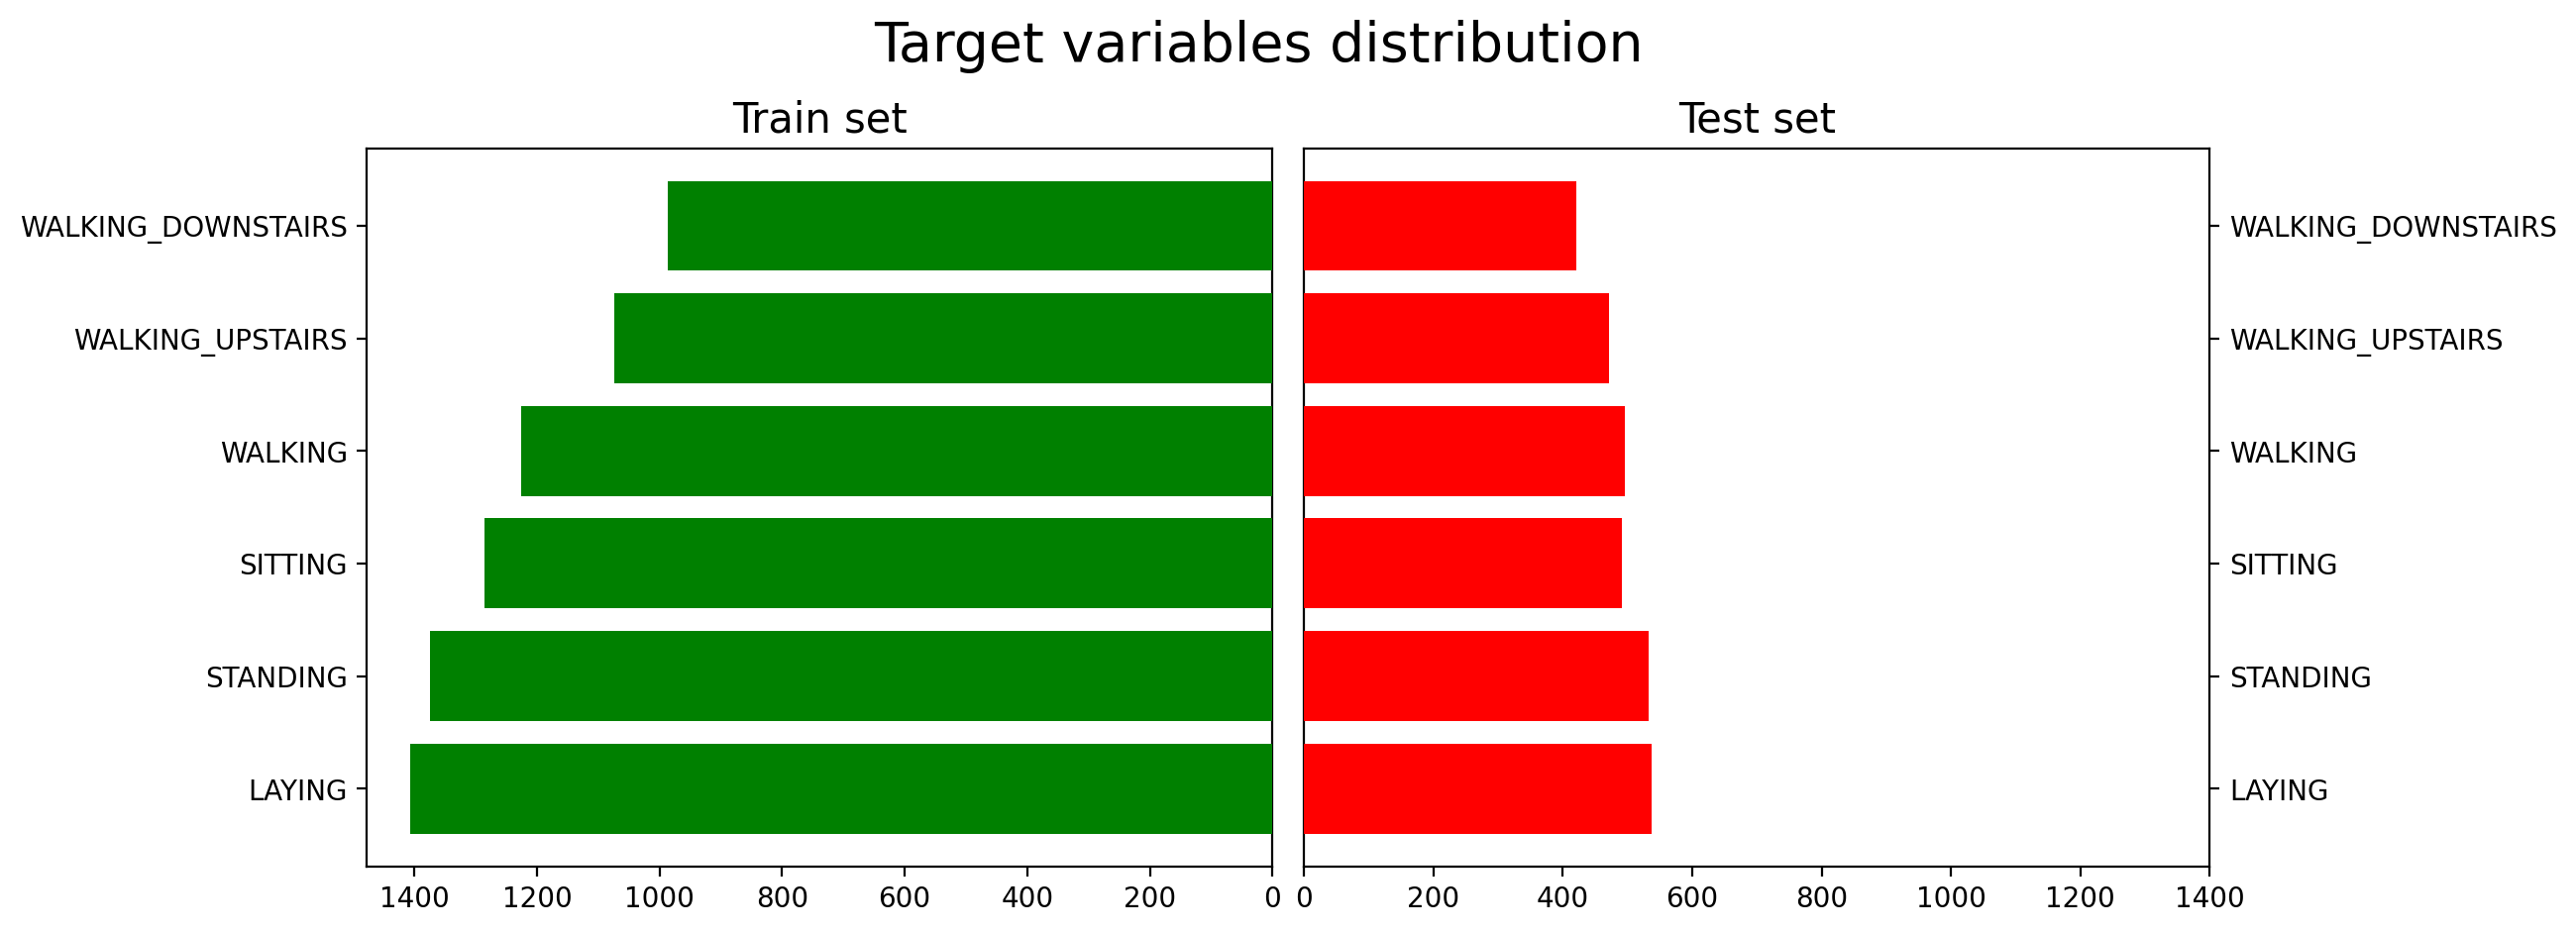

In [17]:
act_tr = train['Activity'].value_counts().sort_values(ascending=False) #посчитаем кол-во наблюдений для всех категорий в test
act_ts = test['Activity'].value_counts()    #в train

act=act_tr.to_frame(name='train')
act['test']=act_ts.to_frame()  #соединим все в один датафрейм

fig, axes = plt.subplots(figsize=(12,5), ncols=2, dpi=200)   #строим график
axes[0].barh(act.index, act.train, align='center', zorder=10, color='g')
axes[0].set_title('Train set', fontsize=15)

axes[1].barh(act.index, act.test, align='center', zorder=10, color='r')
axes[1].set_title('Test set', fontsize=15)

axes[0].invert_xaxis() #наведем красоту
axes[1].yaxis.tick_right()
plt.subplots_adjust(wspace=0.035, top=0.85)
fig.suptitle('Target variables distribution', fontsize=20)
axes[1].set_xticks([0, 200, 400, 600, 800, 1000, 1200, 1400]);

Правда на таких графиках проще проверять баланс классов таргета?)     Конечно!

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать. 

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

Следует исключить из рассмотрения корреляций признак subject - номер испытуемого, так как этот признак придуман искусственно и модель в будущем не должна искать зависимости с этим признаком, потому что на новых данных могут быть совсем другие люди и этот признак при анализе и обучении не нужен. 

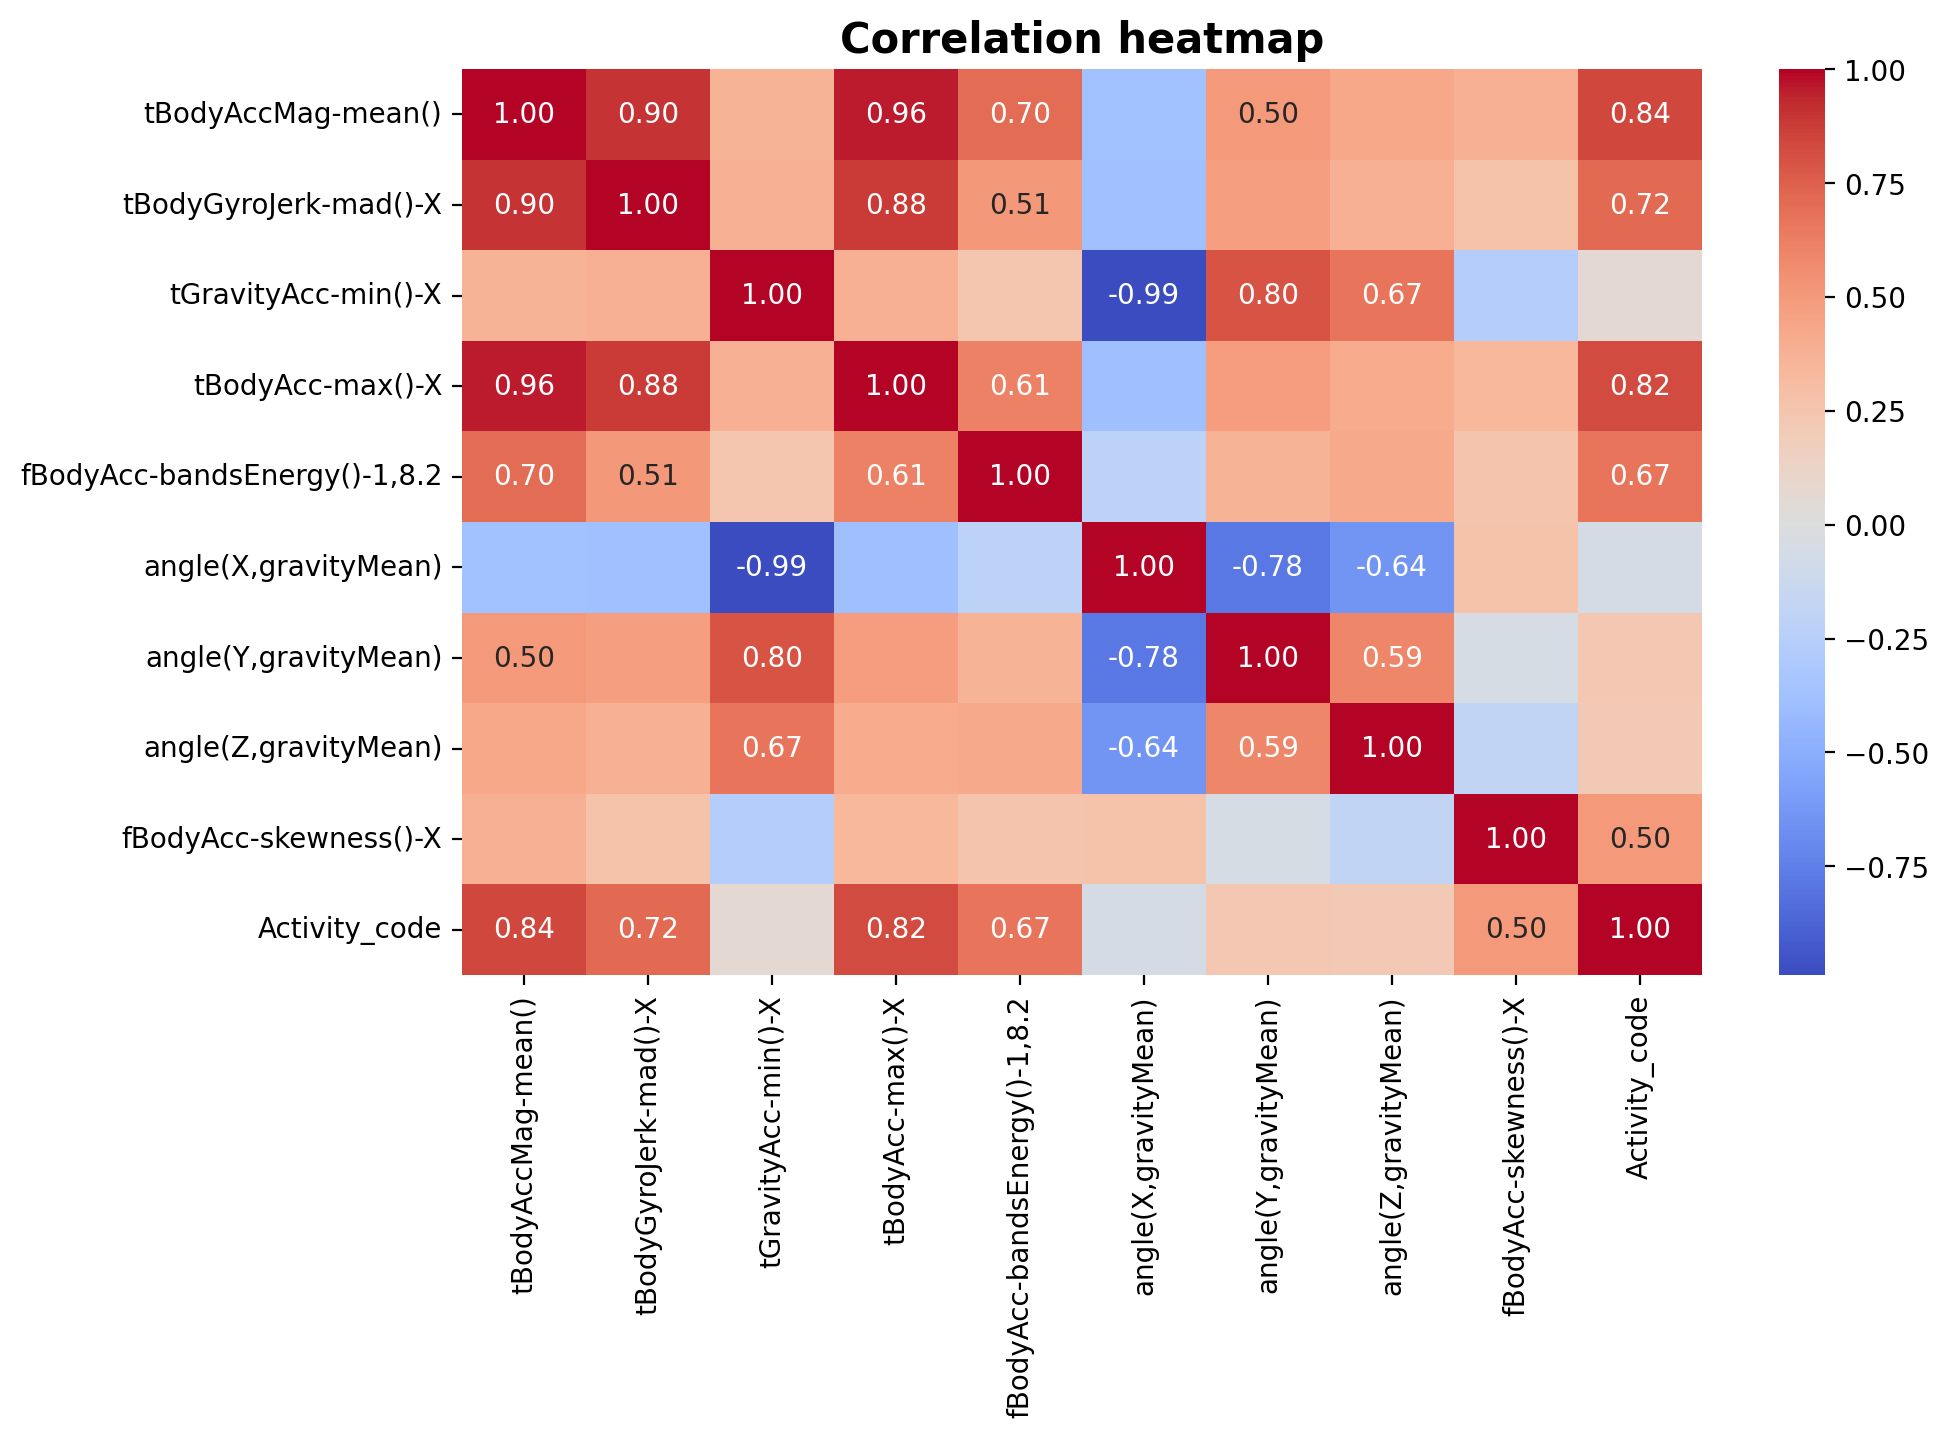

In [18]:
plt.figure(figsize=(10, 6), dpi=200)
hm = sns.heatmap(train.iloc[:, 0:-2].corr(), cmap="coolwarm", annot=True, fmt="0.2f")
for i in hm.texts:
    if float(i.get_text()) >= 0.5 or float(i.get_text()) <= -0.5:
        i.set_text(i.get_text())
    else:
        i.set_text("")
plt.title('Correlation heatmap', weight='bold', size=15);

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков. 

In [19]:
train['Activity'].unique() #активности закодированны в данном порядке 

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

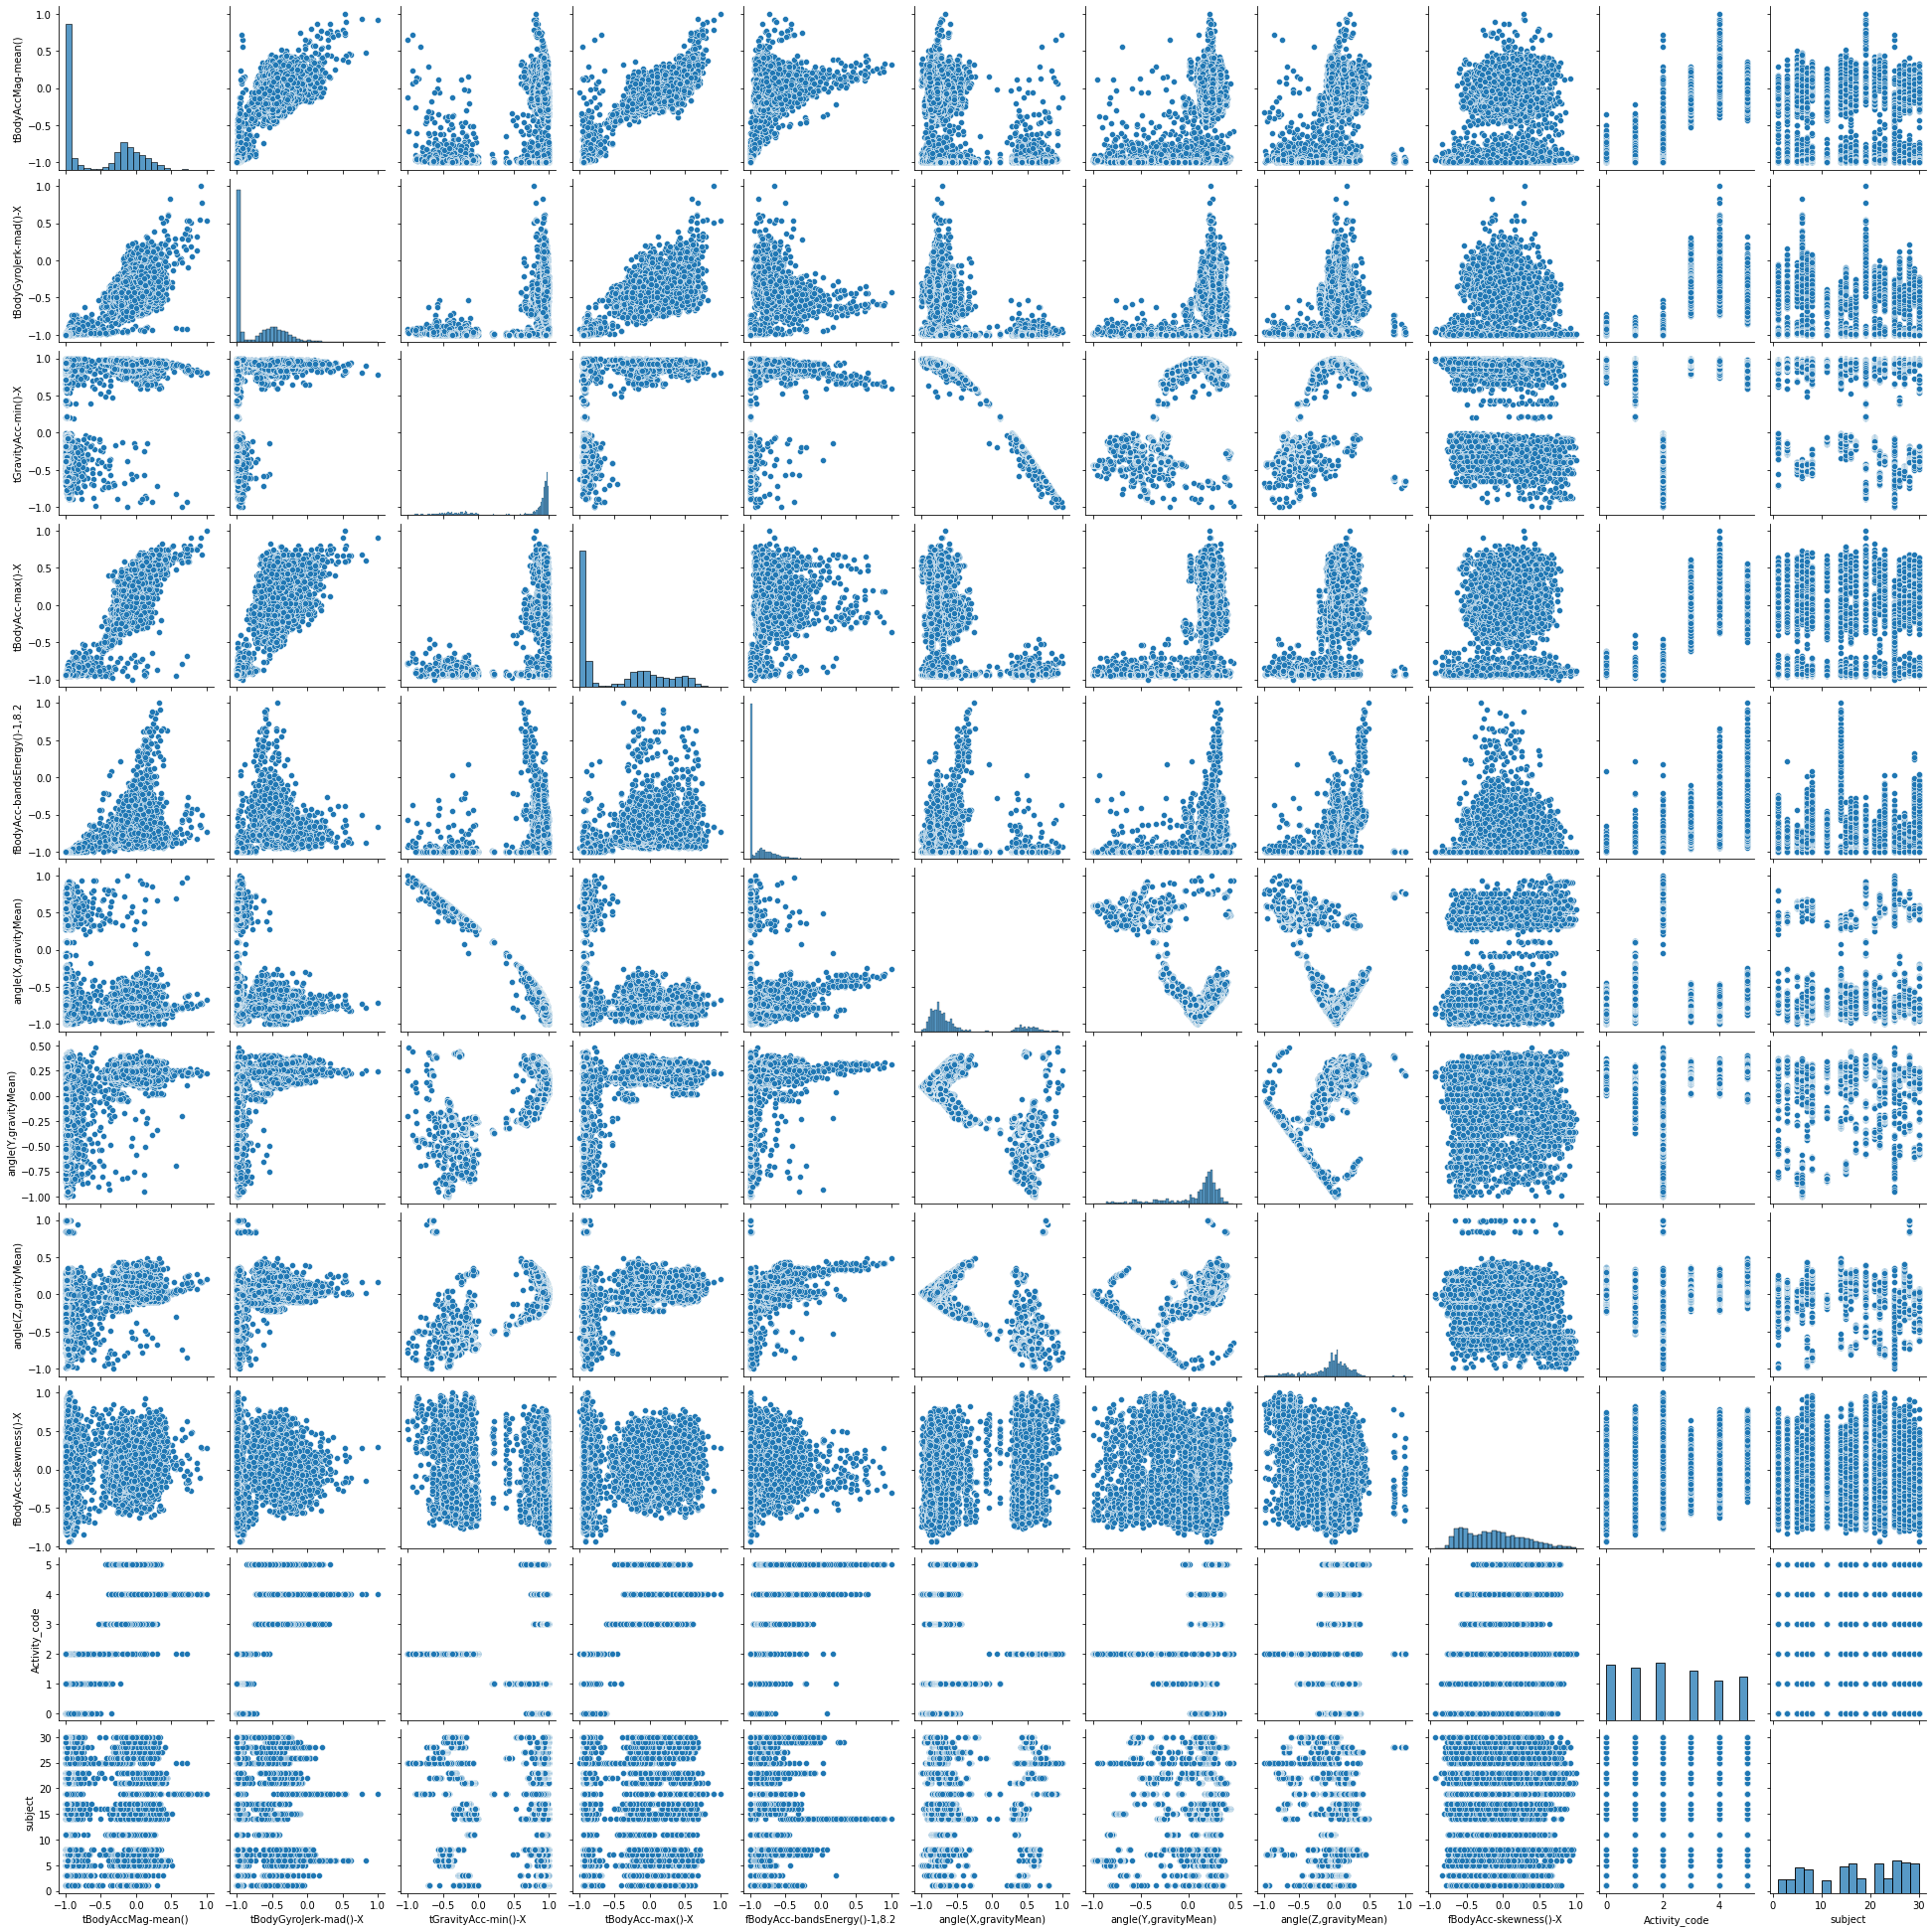

In [20]:
sns.pairplot(train);

Видны замеченные до этого корреляции (например, между angle(X, GravityMean) и tGravityAcc-min()-X или tBodyAccMag-mean() и tBodyAcc-max()-X). 

Также можно заметить некоторые новые зависимости, например при tGravityAcc-min()-X > 0.5 tBodyGyroJerk-mad()-X становится больше -0.5 и другие аналогичные зависимости.

Что касается таргета, то видно, что активность 2 - LAYING сильно отделяется в признаках tGravityAcc-min()-X и angle(X, GravityMean) от других активностей. Также видно, что по признакам tBodyAccMag-mean(), tBodyGyroJerk-mad()-X и tBodyAcc-max()-X активности можно разделить на две категории 0, 1, 2('STANDING', 'SITTING', 'LAYING') - одна категория и 3, 4, 5 ('WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS') -вторая категория.

Конечно, не очень удобно анализировать 100 графиков сразу, однако для нахождения каких-то явных зависимостей среди признаков pairplot можно использовать. 

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы. 

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

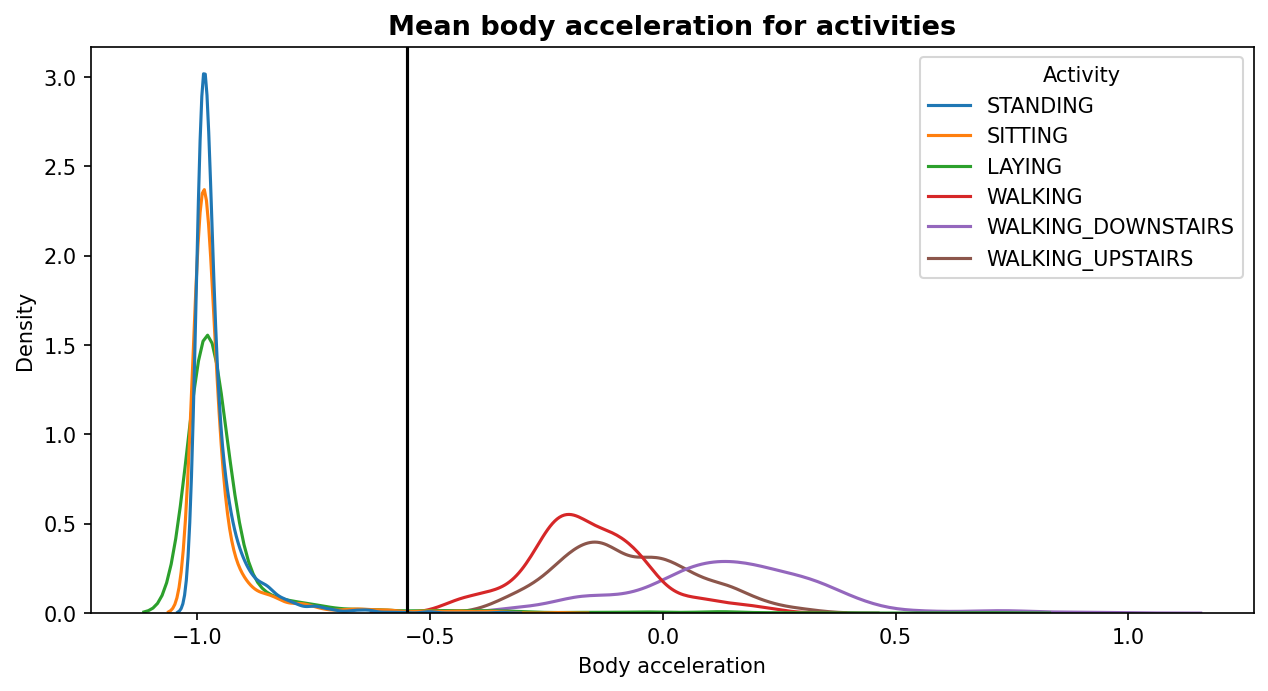

In [21]:
plt.figure(figsize=(10, 5), dpi=150)
plt.title('Mean body acceleration for activities', weight='bold', size=13)
sns.kdeplot(data=train, x='tBodyAccMag-mean()', hue='Activity')
plt.xlabel('Body acceleration')
#Можно поделить все активности на две группы, поэтому проведем вертикальную линию, которая визуально разделяет эти группы
plt.axvline(-0.55, c='black');  

In [22]:
#посчитаем долю правильных ответов при таком разделении на две категории
train[train['tBodyAccMag-mean()'] < -0.55].shape[0] / \
    train[((train['Activity'] =='STANDING') | (train['Activity'] =='SITTING') | (train['Activity']=='LAYING'))].shape[0]

0.9835259404966806

'tBodyAccMag-mean()' (усредненная величина ускорения тела) хорошо разделяет группы активностей на две категории, потому что при таких статичеких активностях как 'STANDING', 'SITTING', 'LAYING' человек почти не перемещается в пространстве, не двигается, поэтому его ускорение будет отрицательно, в отличие от динамических активностей, когда человек двигается, то есть у него будет какое-то ускорение.

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

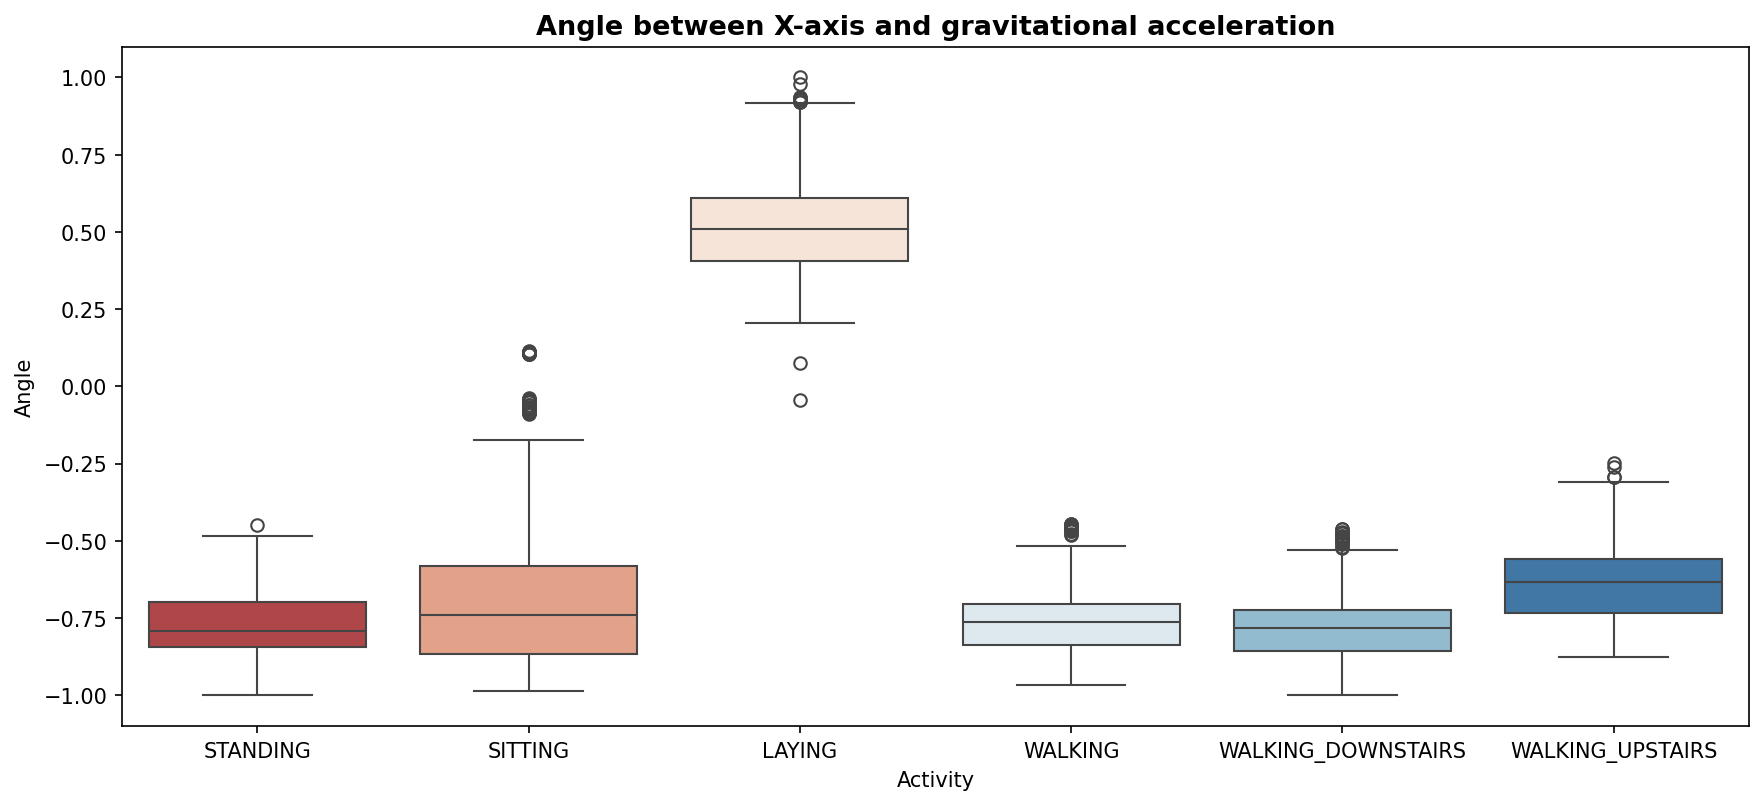

In [23]:
plt.figure(figsize=(14, 6), dpi=150)
sns.boxplot(data=train, x='Activity',y='angle(X,gravityMean)', palette='RdBu')
plt.title('Angle between X-axis and gravitational acceleration', weight='bold', size=13)
plt.ylabel('Angle');

Заметно выделяется категория активности LAYING, её угол положителен в отличие от других. Это логично, так как когда человек лежит, его тело в вертикальном положении в отличие от других активностей. 

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

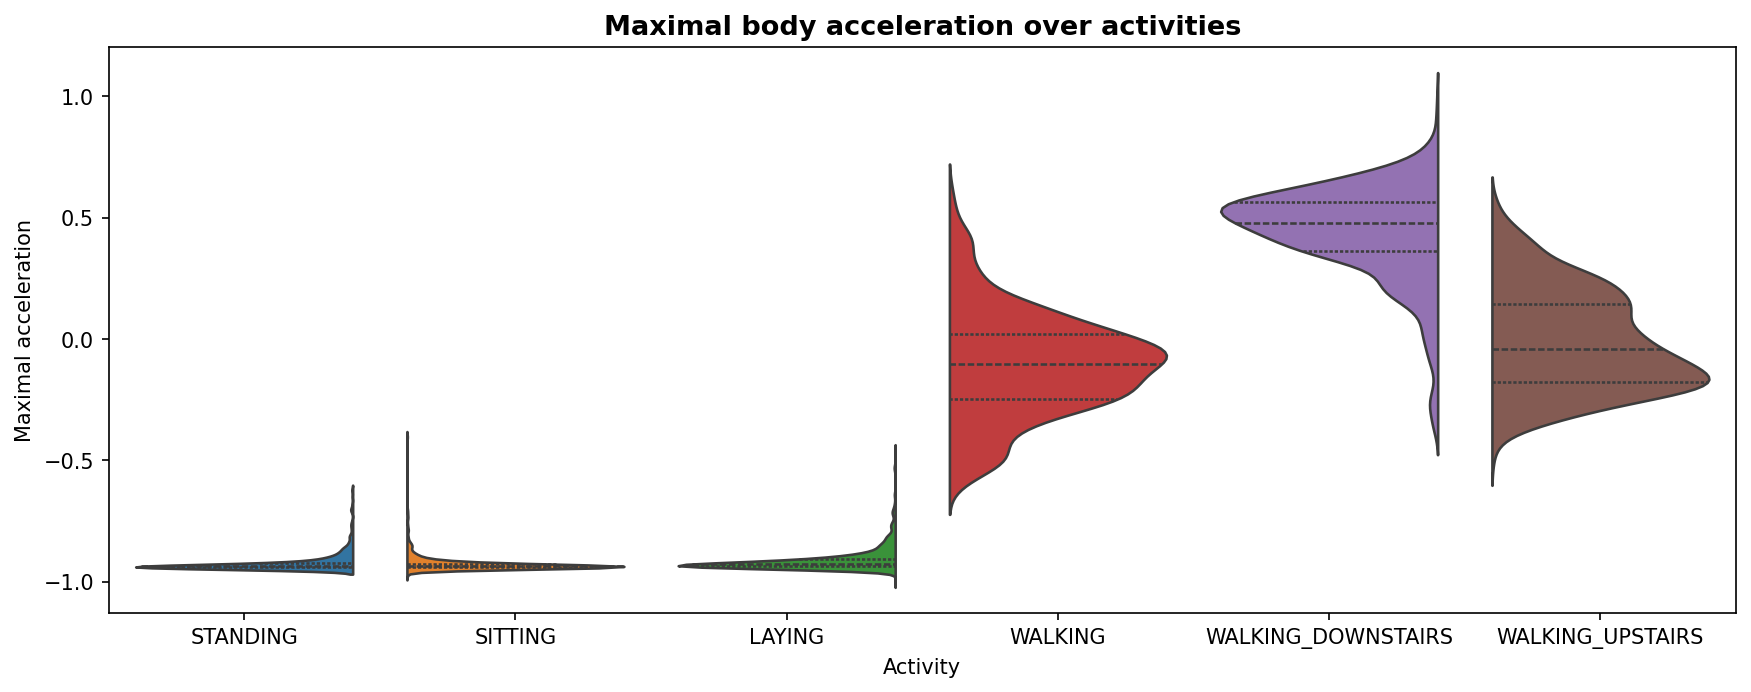

In [24]:
plt.figure(figsize=(14, 5), dpi=150)
sns.violinplot(data=train, x='Activity', y='tBodyAcc-max()-X', hue='Activity', split=True, inner="quart")
plt.title('Maximal body acceleration over activities', weight='bold', size=13)
plt.ylabel('Maximal acceleration');

Выделяется активность WALKING DOWNSTAIRS, она имеет наибольшее максимальное ускорение, что логично в случае, когда человек спускается по лестнице.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим. 

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

In [25]:
#разделим train на две части на динамические и статические активности 
train_stat = train[((train['Activity'] =='STANDING') | (train['Activity'] =='SITTING') | (train['Activity']=='LAYING'))]
train_din = train[(train['Activity'] == 'WALKING') | (train['Activity'] == 'WALKING_DOWNSTAIRS') | (train['Activity'] == 'WALKING_UPSTAIRS')]

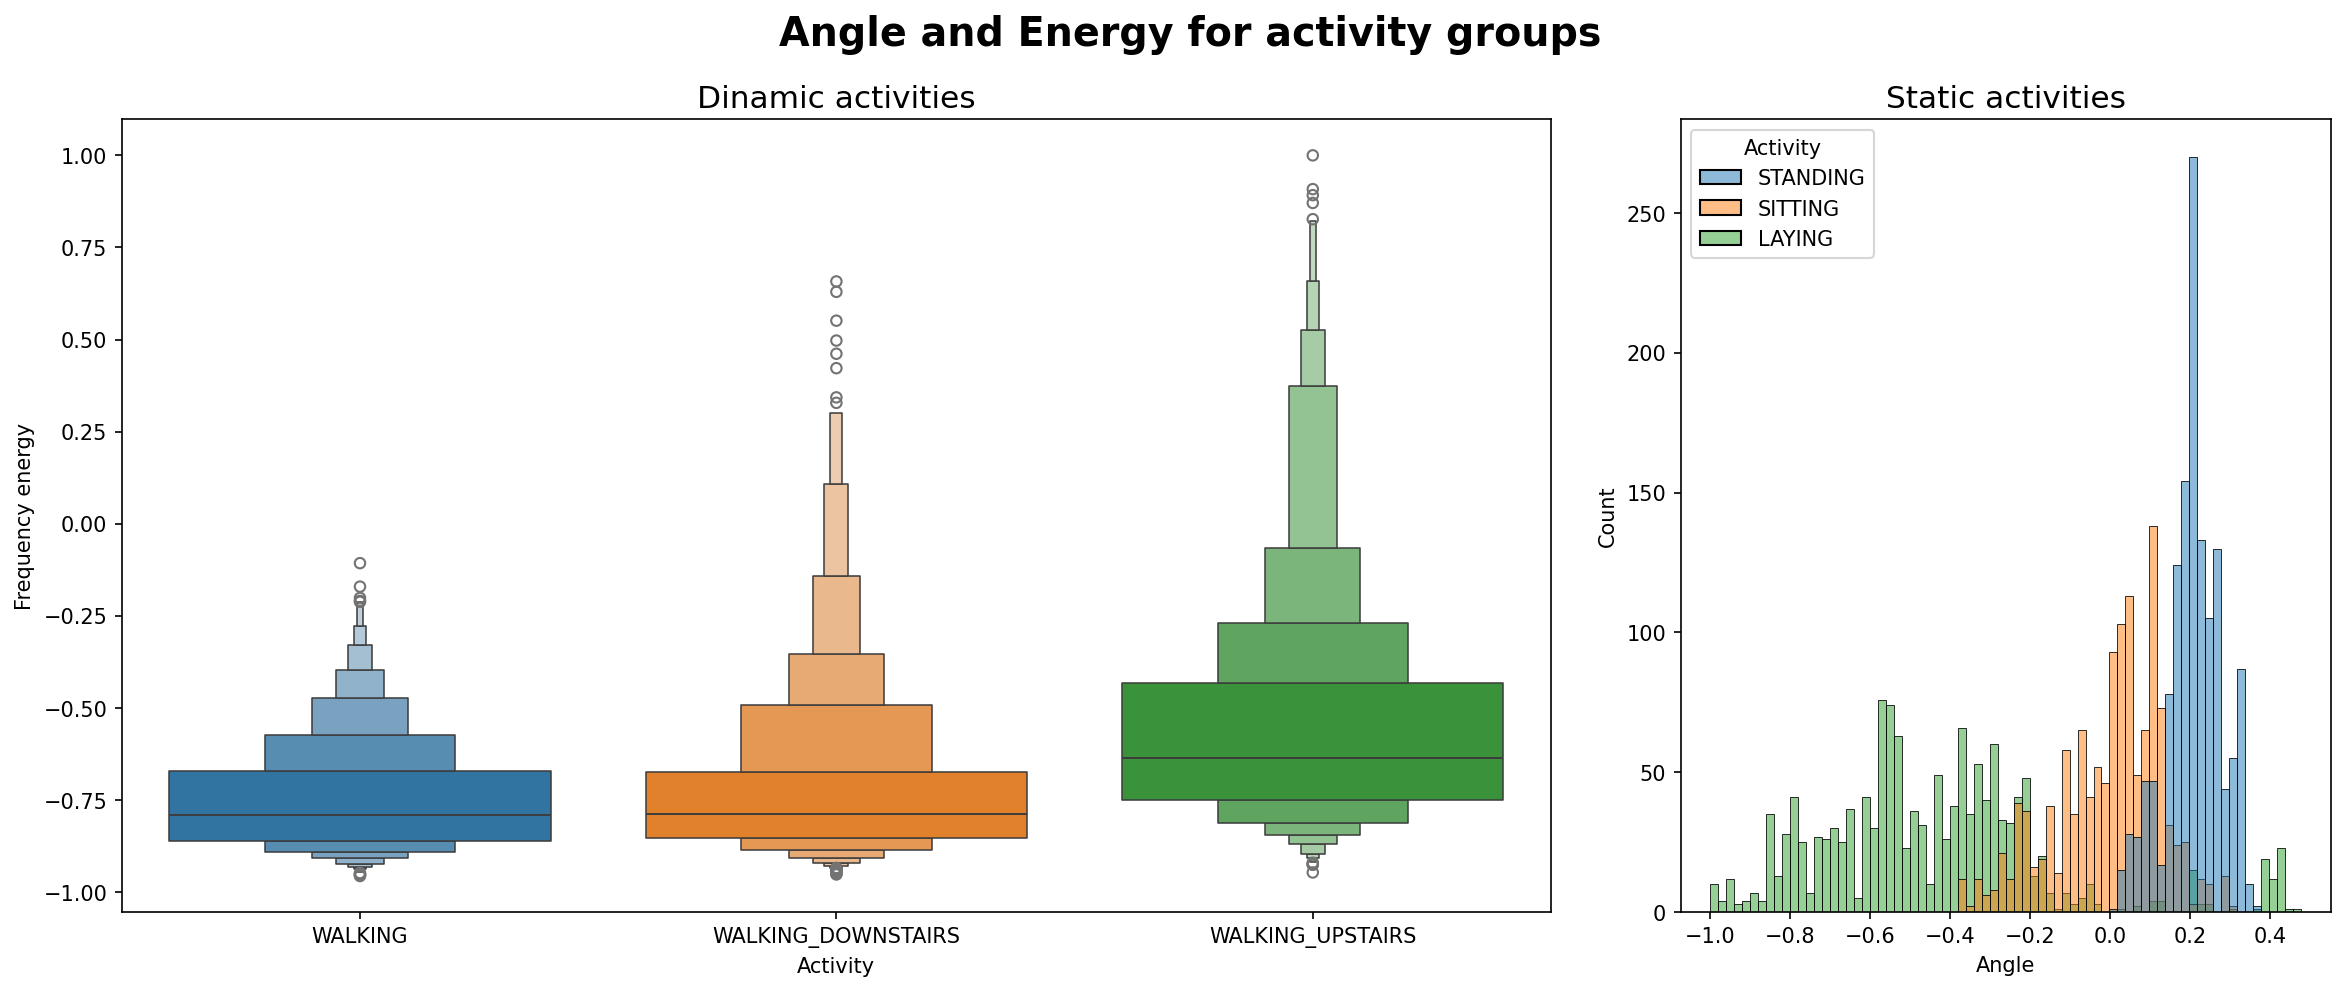

In [26]:
plt.figure(figsize=(19, 7), dpi=150)
plt.suptitle('Angle and Energy for activity groups', weight='bold', size=19)

plt.subplot(1, 3, (1, 2))
sns.boxenplot(data=train_din, x='Activity', y='fBodyAcc-bandsEnergy()-1,8.2', hue='Activity')
plt.title('Dinamic activities', size=15)
plt.ylabel('Frequency energy')

plt.subplot(1, 3, 3)
sns.histplot(data=train_stat, x='angle(Y,gravityMean)', hue='Activity', binwidth=0.02)
plt.title('Static activities', size=15)
plt.xlabel('Angle');

В динамических активностях выделяется активность WALKING_UPSTAIRS по энергии ускорения, а в статических активностях выделяется STANDING, его угол angle(Y,gravityMean) больше чем у других и сконценрирован около 0.2.

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два! 

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория? 

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

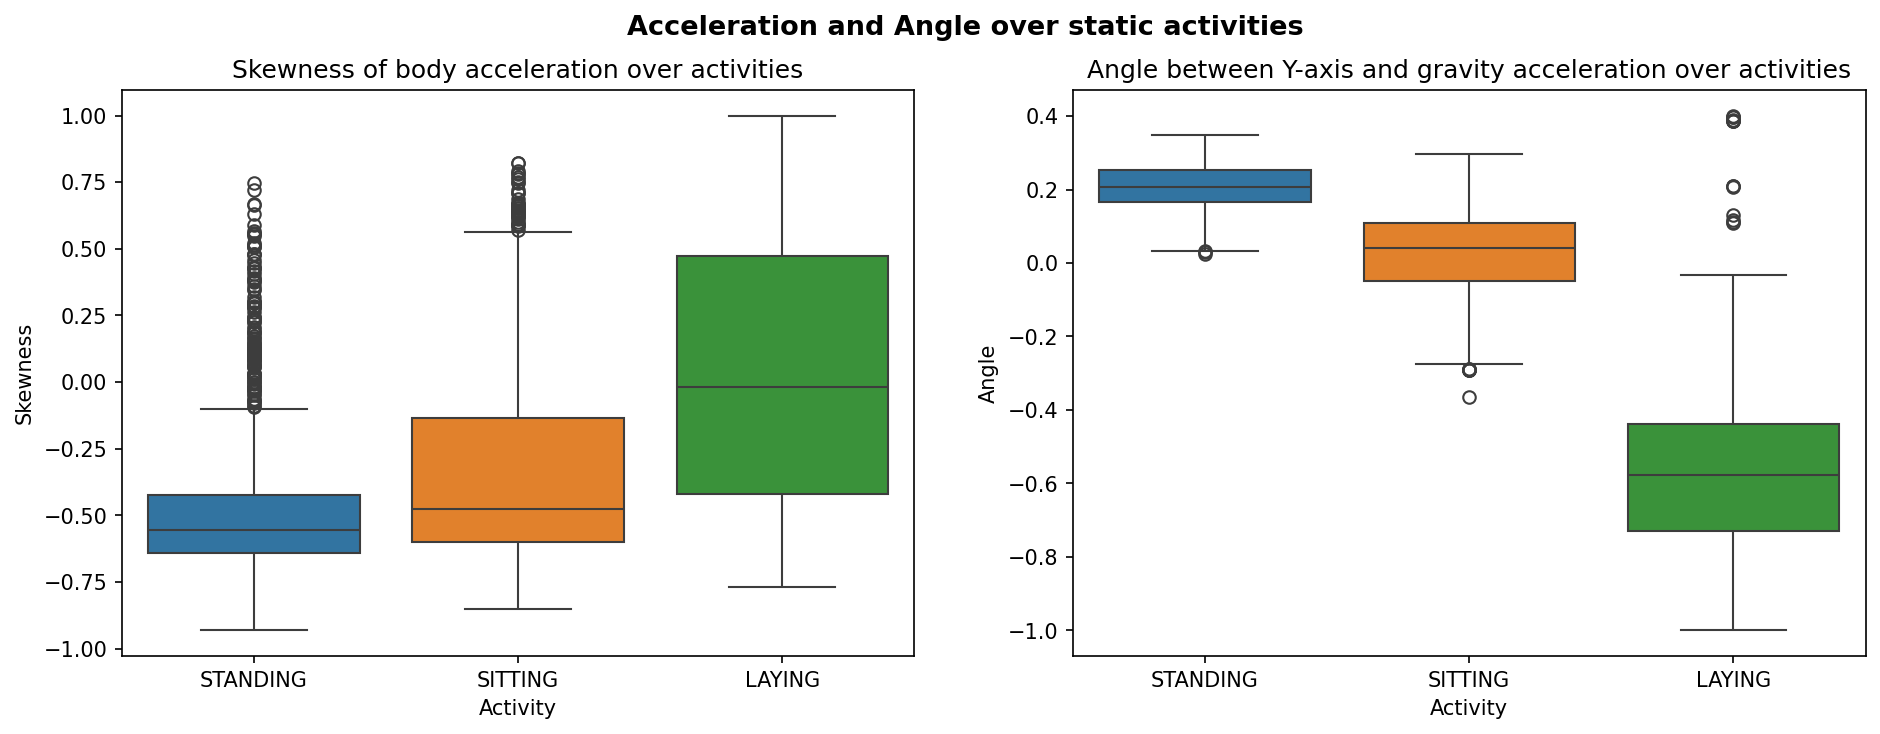

In [27]:
plt.figure(figsize=(15, 5), dpi=150)
plt.suptitle('Acceleration and Angle over static activities', weight='bold', size=13)

plt.subplot(1, 2, 1)
sns.boxplot(data=train_stat, x='Activity', y='fBodyAcc-skewness()-X', hue='Activity')
plt.title('Skewness of body acceleration over activities')
plt.ylabel('Skewness')

plt.subplot(1, 2, 2)
sns.boxplot(data=train_stat[train_stat['fBodyAcc-skewness()-X'] < -0.376], x='Activity', hue='Activity', y='angle(Y,gravityMean)')
plt.title('Angle between Y-axis and gravity acceleration over activities')
plt.ylabel('Angle');

Категории не сильно различимы по fBodyAcc-skewness()-X. А если взять только те строки, где fBodyAcc-skewness()-X < -0.376, и вывести боксплот распределения angle(Y,gravityMean) по разным активностям, то все статические активности достаточно хорошо различимы. 

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет). 

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

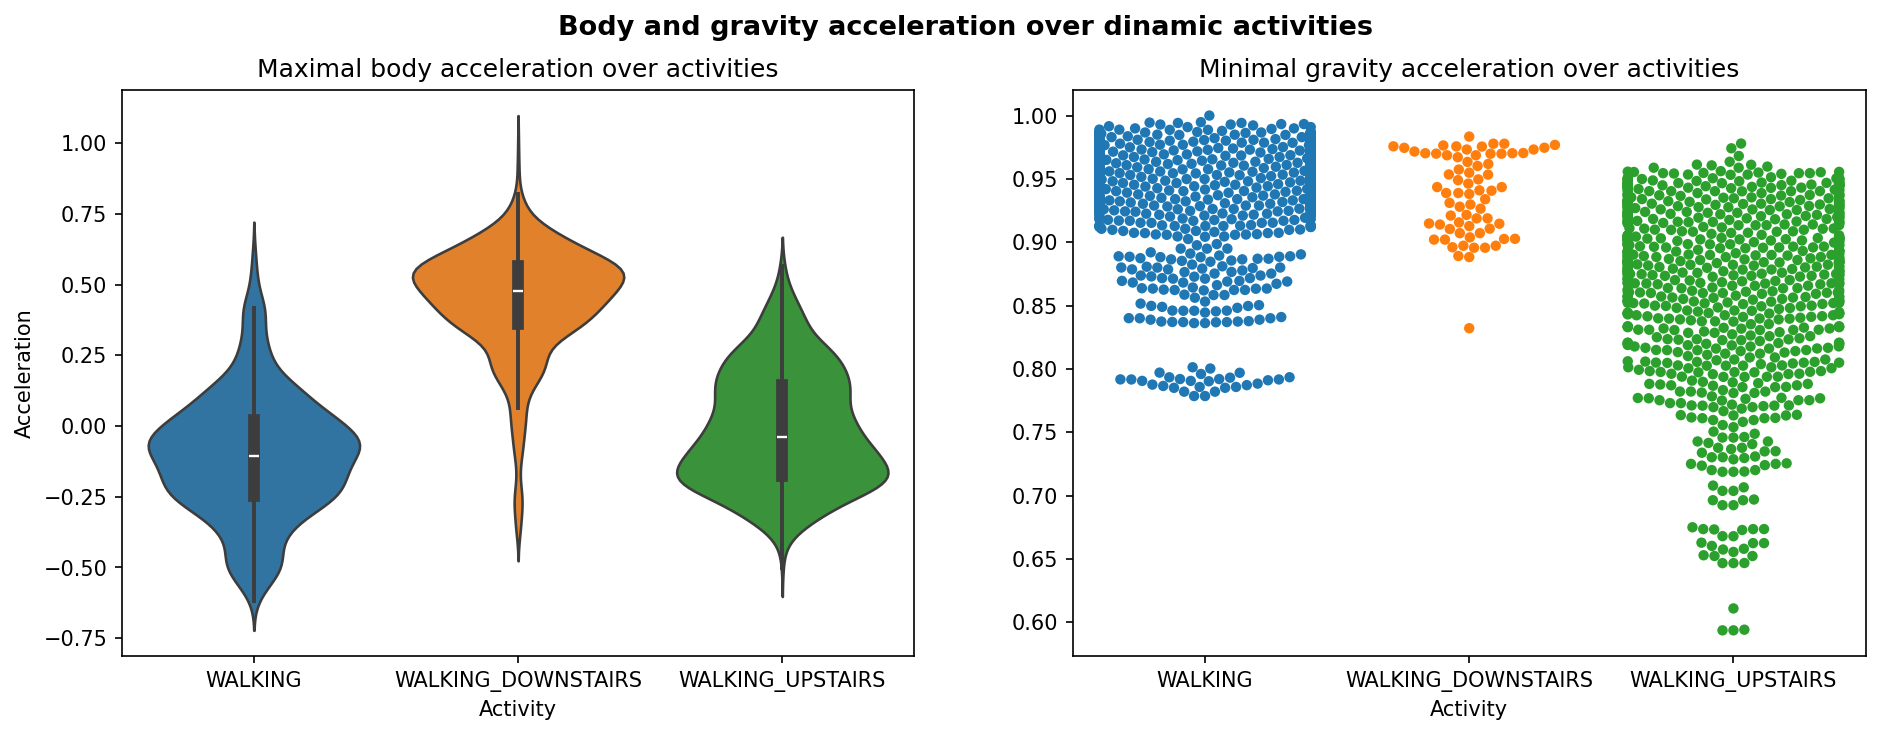

In [28]:
plt.figure(figsize=(15, 5), dpi=150)
plt.suptitle('Body and gravity acceleration over dinamic activities', weight='bold', size=13)

plt.subplot(1, 2, 1)
sns.violinplot(data=train_din, x='Activity', y='tBodyAcc-max()-X', hue='Activity')
plt.title('Maximal body acceleration over activities')
plt.ylabel('Acceleration')

plt.subplot(1, 2, 2)
sns.swarmplot(data=train_din[train_din['tBodyAcc-max()-X'] < 0.157], x='Activity', hue='Activity', y='tGravityAcc-min()-X')
plt.title('Minimal gravity acceleration over activities')
plt.ylabel('');

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html). 

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [29]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: total: 10min 51s
Wall time: 3min 28s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [30]:
import plotly.express as px

In [31]:
px.scatter(df_2_comp, x='x', y='y', color='Activity')

Красиво! Видны скопления точек одного цвета и можно разные активности отделить линиями на данном графике (только есть отделение нескольких точек активности WALKING_UPSTAIRS от основного скопления)

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [32]:
px.scatter_3d(df_3_comp, x='x', y='y', z='z', color='Activity')

Очень красиво! Также точки одного цвета сконцентрированы и можно разделить скопления точек разного цвета. 

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [33]:
def predict(df: pd.DataFrame):
    pred = []
    for i in range(0, df.shape[0]):
        d = df.iloc[i, :]
        if d['tBodyAccMag-mean()'] < -0.55:
            if d['angle(X,gravityMean)'] > 0.24:
                pred.append('LAYING')
            elif d['fBodyAcc-skewness()-X'] < -0.376:
                if d['angle(Y,gravityMean)'] > 0.15:
                    pred.append('STANDING')
                elif d['angle(Y,gravityMean)'] > -0.25:
                    pred.append('SITTING')
                else:
                    pred.append('LAYING')
            elif d['angle(Y,gravityMean)'] > 0.14:
                pred.append('STANDING')
            else:
                pred.append('SITTING')
        else:
            if d['tBodyAcc-max()-X'] > 0.18 and d['tBodyAcc-max()-X'] > 0.25:
                pred.append('WALKING_DOWNSTAIRS')
            elif d['tBodyAcc-max()-X'] < 0.157:
                if d['tGravityAcc-min()-X'] > 0.91:
                    pred.append('WALKING')
                else:
                    pred.append('WALKING_UPSTAIRS')
            elif d['fBodyAcc-bandsEnergy()-1,8.2'] > -0.64:
                pred.append('WALKING_UPSTAIRS')
            else:
                pred.append('WALKING')
    return pred
    

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [34]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8340587595212187
Accuracy on test set => 0.7767220902612827


__Место для мема и/или фидбэка__  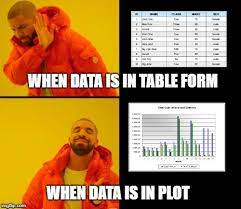